<a href="https://colab.research.google.com/github/souiyah-hajar/portfolio-hajar/blob/main/Analysis_sentiment_mental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("Combined Data.csv")

In [ ]:
df.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
statement,362
status,0


In [ ]:
df = df.drop("Unnamed: 0",axis=1)

In [ ]:
df = df.dropna(subset=["statement"])

In [ ]:
df.isnull().sum()

,0
statement,0
status,0


In [ ]:
df.shape

(52681, 2)

In [ ]:
df["status"].unique()

array(['Anxiety', 'Normal', 'Depression', 'Suicidal', 'Stress', 'Bipolar',
       'Personality disorder'], dtype=object)

In [ ]:
df["status"].value_counts()

,count
status,
Normal,16343
Depression,15404
Suicidal,10652
Anxiety,3841
Bipolar,2777
Stress,2587
Personality disorder,1077


<Axes: title={'center': 'Distribution of Mental Health Status'}, xlabel='status'>

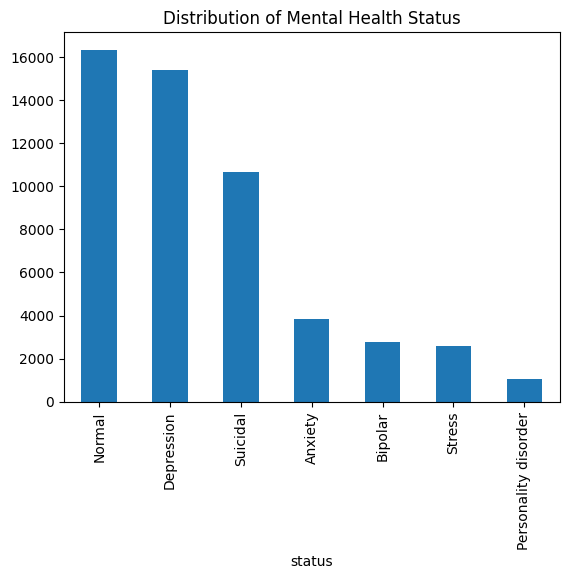

In [ ]:
df['status'].value_counts().plot(kind='bar', title='Distribution of Mental Health Status')

In [ ]:
#Text Preprocessing

In [ ]:
df["statement"] = df["statement"].str.lower()

In [ ]:
import re

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
def preprocess_text(text):
    # Remove special characters
    text = re.sub(r'[^a-zA-Z0-9]+', ' ', text)
    text = ' '.join(text.split())
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

In [ ]:
df["Cleaned_Data"] = df["statement"].apply(preprocess_text)

In [ ]:
df["Cleaned_Data"]

,Cleaned_Data
0,oh gosh
1,trouble sleeping confused mind restless heart ...
2,wrong back dear forward doubt stay restless re...
3,shifted focus something else still worried
4,restless restless month boy mean
...,...
53038,nobody takes seriously 24m dealt depression an...
53039,selfishness feel good like belong world think ...
53040,way sleep better sleep nights meds help
53041,public speaking tips hi give presentation work...


In [ ]:
#Tokenization

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df["Cleaned_Data"] = df["statement"].apply(lemmatize_words)

In [ ]:
df.head()

,statement,status,Cleaned_Data
0,oh my gosh,Anxiety,oh my gosh
1,"trouble sleeping, confused mind, restless hear...",Anxiety,"trouble sleeping, confused mind, restless hear..."
2,"all wrong, back off dear, forward doubt. stay ...",Anxiety,"all wrong, back off dear, forward doubt. stay ..."
3,i've shifted my focus to something else but i'...,Anxiety,i've shifted my focus to something else but i'...
4,"i'm restless and restless, it's been a month n...",Anxiety,"i'm restless and restless, it's been a month n..."


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df["Cleaned_Data"], df["status"], test_size=0.20, random_state=42)

NameError: name 'df' is not defined

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer()
X_train_bow = bow.fit_transform(X_train).toarray()
X_test_bow = bow.transform(X_test).toarray()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()

NameError: name 'X_train' is not defined

In [ ]:
X_train_bow

<42144x51296 sparse matrix of type '<class 'numpy.int64'>'
	with 2619199 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model_bow = GaussianNB().fit(X_train_bow, y_train)
nb_model_tfidf = GaussianNB().fit(X_train_tfidf, y_train)

TypeError: Sparse data was passed for X, but dense data is required. Use '.toarray()' to convert to a dense numpy array.

In [ ]:
model.fit(X_train_bow, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test_bow)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
# Example input sentence related to depression
input_sentence = "I feel anxious and restless all the time."

# Preprocess the input sentence if needed (e.g., lowercasing)
input_sentence_processed = input_sentence.lower()

# Transform the input sentence to the same format as the training data
input_bow = bow.transform([input_sentence_processed])

# Predict the sentiment using the trained model
predicted_sentiment = model.predict(input_bow)

# Output the prediction
print("Predicted Sentiment:", predicted_sentiment[0])

Predicted Sentiment: Anxiety
